# Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

from sklearn import preprocessing
from sklearn.model_selection import GroupShuffleSplit

import time

In [2]:
tf.random.set_seed(0)

In [3]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


# Data loading

In [4]:
path = "/content/drive/MyDrive/Thesis/Datasets/Pasteurizer_dataset/"

In [5]:
train_df = pd.read_csv(path+ "centralized/train_set.csv")
test_df = pd.read_csv(path+ "centralized/test_set.csv")

In [6]:
train_df

,paster_id,paster_timeslot,prev_water_temp,prev_can_temp,curr_water_temp,bath_number,curr_bath_temp,curr_can_temp
0,129,20,32.84,29.79,34.81,1,40.0312,29.83
1,129,30,34.81,29.83,36.60,1,40.0312,29.88
2,129,40,36.60,29.88,36.28,1,40.0312,29.94
3,129,50,36.28,29.94,35.90,1,40.0062,30.05
4,129,60,35.90,30.05,36.49,1,40.0062,30.22
...,...,...,...,...,...,...,...,...
45258,185,1820,37.14,39.71,37.58,6,36.3437,39.54
45259,185,1830,37.58,39.54,37.72,6,36.4062,39.43
45260,185,1840,37.72,39.43,37.72,6,36.4438,39.31
45261,185,1850,37.72,39.31,37.66,6,36.4688,39.18


In [7]:
test_df

,paster_id,paster_timeslot,prev_water_temp,prev_can_temp,curr_water_temp,bath_number,curr_bath_temp,curr_can_temp
0,24,20,36.24,30.32,36.87,1,41.8063,30.38
1,24,30,36.87,30.38,37.21,1,41.8063,30.44
2,24,40,37.21,30.44,38.49,1,41.7813,30.50
3,24,50,38.49,30.50,39.13,1,41.7250,30.58
4,24,60,39.13,30.58,38.45,1,41.6812,30.70
...,...,...,...,...,...,...,...,...
11320,198,1780,36.92,38.66,36.97,6,36.0000,38.60
11321,198,1790,36.97,38.60,37.00,6,36.0000,38.57
11322,198,1800,37.00,38.57,36.97,6,36.0687,38.54
11323,198,1810,36.97,38.54,36.93,6,36.0625,38.52


# Preparing Data

In [8]:
train_df.head()

,paster_id,paster_timeslot,prev_water_temp,prev_can_temp,curr_water_temp,bath_number,curr_bath_temp,curr_can_temp
0,129,20,32.84,29.79,34.81,1,40.0312,29.83
1,129,30,34.81,29.83,36.60,1,40.0312,29.88
2,129,40,36.60,29.88,36.28,1,40.0312,29.94
3,129,50,36.28,29.94,35.90,1,40.0062,30.05
4,129,60,35.90,30.05,36.49,1,40.0062,30.22


In [9]:
# Train test numpy arrays
X_train = train_df.drop(['curr_can_temp','paster_id'], axis=1).values
y_train = train_df['curr_can_temp'].values


X_test = test_df.drop(['curr_can_temp','paster_id'], axis=1).values
y_test = test_df['curr_can_temp'].values

In [10]:
# gss = GroupShuffleSplit(n_splits=1, train_size=0.80, random_state=42)

# X_train, X_val = gss.split(X_train_full, groups = y_train_full)

In [11]:
# Min max normalizaiton

min_max_scaler = preprocessing.MinMaxScaler()

X_train_norm_ = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)


In [24]:
X_train.shape

(45263, 6)

In [13]:
X_test.shape

(11325, 6)

# Model Definition

In [14]:
# Defining DNN model

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

# Training

In [15]:
start = time.time()

model.compile(loss='mean_squared_error', optimizer="adam")  # the model is recompiled to reset the optimizer

history = model.fit(X_train, y_train,
                    # validation_data=(val_split_array, val_split_label),
                    epochs=10,
                   batch_size=32)
end = time.time()
print(f"Training time {end - start:.2f} sec")

Epoch 1/10
1415/1415 [==============================] - 5s 3ms/step - loss: 227.1516
Epoch 2/10
1415/1415 [==============================] - 4s 3ms/step - loss: 14.1832
Epoch 3/10
1415/1415 [==============================] - 4s 3ms/step - loss: 3.4359
Epoch 4/10
1415/1415 [==============================] - 5s 3ms/step - loss: 0.4801
Epoch 5/10
1415/1415 [==============================] - 4s 3ms/step - loss: 0.2499
Epoch 6/10
1415/1415 [==============================] - 4s 3ms/step - loss: 0.5123
Epoch 7/10
1415/1415 [==============================] - 2s 2ms/step - loss: 0.4281
Epoch 8/10
1415/1415 [==============================] - 2s 1ms/step - loss: 0.4587
Epoch 9/10
1415/1415 [==============================] - 2s 1ms/step - loss: 0.5338
Epoch 10/10
1415/1415 [==============================] - 2s 1ms/step - loss: 0.3458
Training time 33.79 sec


# Evaluation

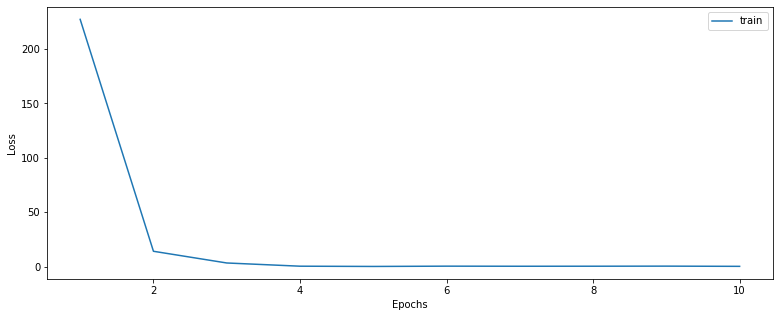

In [16]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    # plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [17]:

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [18]:
# predict and evaluate
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:0.3385429107596963, R2:0.9987697679679812
test set RMSE:0.3321262306486624, R2:0.9987825331956359


In [19]:
# y_test

In [20]:
# y_hat_test